# Deep Learning _ Convolutional NN _ Image Processing

This notebook aims at summarizing the basics of Image Processing using Convolutional Neural Network.

## Mathematics
eh
no

# Basic Machine Learning

I suck at maths so we'll just gloss over the main categories of ML and spiral into Deep Learning. Typically an ML can be split into either supervised or unsupervised (see below); it can be parametric (having a fixed number of parameters) or nonparametric (not that). Do not ask me any further questions as i wont be able to answer 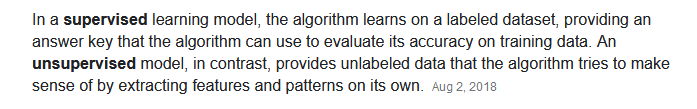

# Neural prediction

A network generally works by having a matrix of weights, and by feeding inputs into this matrix and adjusting the weights to match the true outputs, it learns. The process of calculating the inputs with the matrix is called forward-propagation. The process of calculating the different between (true output) and (calculated output) and using this to adjust the weight is called back-propagation

In [55]:
import numpy as np
#for example one input pair for y = 2x - 1
x = -1.0
y = -3.0

#--------this is forward propagation------------
#initialize the weight matrix. here I'm manually creating one.
weights0 = np.array([[1.0,0.0,1.0]])
layer1 = x*weights0

#lets add one more layer. the product of the first layer is then passed thru this second layer
weights1 = np.array([[1.0],[1.0],[1.0]])
layer2 = layer1.dot(weights1)
#--------this is forward propagation------------

output = layer2
print(weights0)
print(weights1)

[[1. 0. 1.]]
[[1.]
 [1.]
 [1.]]


In [56]:
#--------this is backward propagation------------
#find the error function between the output and y
#here is the mean squared error function
error = (y - output) ** 2

#now is how will this error adjust the weights
#gradient descent. basically derivatives but with a bunch of variables lol. 

#derivative of the error function 
weights1_delta = layer1.T.dot(y - output)
weights1 += weights1_delta

#similarly backward propagate back to the first weight layer
weights0_delta = x*(weights0.dot(weights1_delta))
weights0 += weights0_delta

print(weights0)
print(weights1)
#--------this is backward propagation------------

[[-1. -2. -1.]]
[[2.]
 [1.]
 [2.]]


This process will then be looped and adjust the weights to predict the out put given input. When given input array, just change the model to work with arrays/tensors : )

In [66]:
#Keras : )
import tensorflow as tf
import numpy as np
from tensorflow import keras

#---------the learning model---------------------------------------------------------------------
model = keras.Sequential( 
[keras.layers.Dense(units=1,input_shape=[1], use_bias=True)] #this model has one layer 
)
model.compile(optimizer='sgd',loss='mean_squared_error')
model.summary()
#---------the learning model---------------------------------------------------------------------

#---------the input------------------------------------------------
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
#---------the input------------------------------------------------

#---------train the model with the input-------
model.fit(xs #input
          , ys #output
          , epochs=500 #number of loops
         )
#---------train the model with the input-------

#--------use the trainED model to predict new info-----
print(model.predict([10.0]))
#correct answer is 19
#--------use the trainED model to predict new info-----

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 217ms/step - loss: 46.3133
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 36.8170
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 29.3379
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 23.4461
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 18.8033
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 15.1431
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 12.2564
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 9.9781
Epoch 9/500
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 0.0317
Epoch 201/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 202/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0304
Epoch 203/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0298
Epoch 204/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0292
Epoch 205/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0286
Epoch 206/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0280
Epoch 207/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0274
Epoch 208/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0269
Epoch 209/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 210/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0258
Epoch 211/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 212/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 4.7901e-04
Epoch 403/500
1/1 [==============================] - 0s 3ms/step - loss: 4.6917e-04
Epoch 404/500
1/1 [==============================] - 0s 3ms/step - loss: 4.5953e-04
Epoch 405/500
1/1 [==============================] - 0s 3ms/step - loss: 4.5009e-04
Epoch 406/500
1/1 [==============================] - 0s 3ms/step - loss: 4.4084e-04
Epoch 407/500
1/1 [==============================] - 0s 3ms/step - loss: 4.3179e-04
Epoch 408/500
1/1 [==============================] - 0s 2ms/step - loss: 4.2292e-04
Epoch 409/500
1/1 [==============================] - 0s 5ms/step - loss: 4.1423e-04
Epoch 410/500
1/1 [==============================] - 0s 3ms/step - loss: 4.0572e-04
Epoch 411/500
1/1 [==============================] - 0s 3ms/step - loss: 3.9739e-04
Epoch 412/500
1/1 [==============================] - 0s 4ms/step - loss: 3.8923e-04
Epoch 413/500
1/1 [==============================] - 0s 3ms/step - loss: 3.8123e-04
Epoch 

## As you add more layers and functions in the model, it becomes a deep neural network

## Bias and variance // underfitting vs just-right:) vs overfitting

Bias vs Variance provide useful language to discuss the problem and tuning of NN model. However, I'm so lazy man so we're jumping straight into underfitting and overfitting :)

When you feed input data into an NN, the data won't always be consice and contain the exact patterns you want the model to learn. Imagine, you build a model to recognize a cat, but the input image has a cat laying over the grass for example. If you allow the netwrok to learn too much, it'll also learn the noisy details such as the grass and the sky. This is called overfitting. There are a number of regularizations to combat this. 

Conversely, when you allow the network to learn too little, it may not learn enough to even recognize a cat yet! This is underfitting. You can add complexity or allow the networks more epochs, depending on what the problem actually is.

<img src="fitting.png">

# Activation functions

However, consider: input  weight_1 x weight_2 = input x (weight_1 x weight_2) meaning as of now, the neural network if conpletely linear and its product is still functionally one times product (input x weight). So the network, as of now, won't be able to predict such functions as polynomial or non-linearity in general. 

To add complexity and help the network lean pattern, we add activation functions to the current layers, and these activation functions work to add non-linearity to our model.

for example, here's a graph of tanh function. the input from the x-axis is plotted into a curve. There are other activations and you can choose which one to use depending on the task
<img src="index.png">

# Practice problem no.1 :)

## Use the mnist handwritten number dataset to create a (non-convolutional) neural network that predict handwritten numbers :)
 -> Look into *dropout* for this problem